In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
import math
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.manifold import MDS
%matplotlib inline

In [2]:
data = pd.read_csv("/Users/piyushkhemka/Desktop/vis_project/data/actresses.csv")

In [3]:
data = data.set_index("name")

In [4]:
data.drop(['dob'], axis = 1, inplace = True, errors = 'ignore')

In [5]:
data.drop(['height'], axis = 1, inplace = True, errors = 'ignore')

In [6]:
sse = []
cluster = []
for i in xrange(1,16,1):
    kmeans = KMeans(n_clusters=i).fit(data)
    sse.append(math.floor((kmeans.inertia_)))
    cluster.append(i)

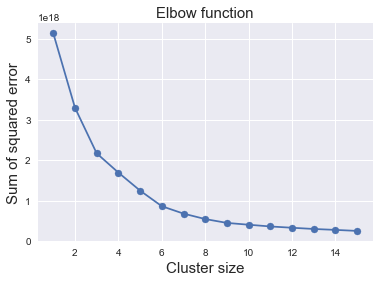

In [7]:
plt.scatter(cluster,sse)
plt.plot(cluster,sse)
plt.xlabel("Cluster size", fontsize=15)
plt.ylabel("Sum of squared error", fontsize=15)
plt.title("Elbow function", fontsize = 15)

In [8]:
kmeans = KMeans(n_clusters=3).fit(data)

In [9]:
data['cluster'] = kmeans.labels_

In [10]:
clus1 = pd.DataFrame()
clus2 = pd.DataFrame()
clus3 = pd.DataFrame()

In [11]:
clus1 = data[data['cluster'] == 0]
clus2 = data[data['cluster'] == 1]
clus3 = data[data['cluster'] == 2]

In [12]:
print(clus1.shape)
print(clus2.shape)
print(clus3.shape)

(7868, 48)
(1159, 48)
(104, 48)


In [13]:
clus1 = clus1.sample(frac=0.05)
clus2 = clus2.sample(frac=0.05)
clus3 = clus3.sample(frac=0.05)
frames = [clus1, clus2, clus3]
stratified_sample = pd.concat(frames)
stratified_sample = stratified_sample.drop(["cluster"],axis=1)
data = data.drop(["cluster"],axis=1)

In [14]:
stratified_sample.shape

(456, 47)

In [15]:
stratified_sample_nogenre = pd.DataFrame()
stratified_sample_nogenre['votes'] = stratified_sample['votes']
stratified_sample_nogenre['rating'] = stratified_sample['rating']
stratified_sample_nogenre['age'] = stratified_sample['age']
stratified_sample_nogenre['heightcm'] = stratified_sample['heightcm']
stratified_sample_nogenre['gross'] = stratified_sample['gross']
stratified_sample_nogenre['salary'] = stratified_sample['salary']
stratified_sample_nogenre['totalawards'] = stratified_sample['totalawards']

In [16]:
stratified_sample_nogenre.head()

votes    rating  age  heightcm  gross  salary  \
name                                                                       
Gold Diana             11.307692  6.884615   29     168.0    0.0     0.0   
Rapaport Alexandra   2529.538462  6.351282   45     162.0    0.0     0.0   
Riley Amber           539.123457  7.902469   30     155.0    0.0     0.0   
Samuel Joanne       16439.388890  6.788889   59     162.5    0.0     0.0   
Richards Rhylee       574.200000  7.520000   36     173.0    0.0     0.0   

                    totalawards  
name                             
Gold Diana                    0  
Rapaport Alexandra            0  
Riley Amber                   0  
Samuel Joanne                 0  
Richards Rhylee               0

In [17]:
stratified_sample_normalized = (stratified_sample_nogenre - stratified_sample_nogenre.mean()) / stratified_sample_nogenre.std()

In [18]:
pairwise_distance = metrics.pairwise_distances(stratified_sample_normalized, metric = 'euclidean')
mds_data = MDS(n_components=2, dissimilarity='precomputed')
stratified_euclidean = pd.DataFrame(mds_data.fit_transform(pairwise_distance))

In [19]:
stratified_euclidean.head()

0         1
0 -0.469165  0.605279
1  0.382981 -0.149001
2 -1.494479 -1.488967
3  0.470215 -0.761247
4 -1.096225  1.134856

In [20]:
stratified_sample_copy = stratified_sample.reset_index()
stratified_sample_copy.head()

name         votes       id    rating  age  heightcm  Action  \
0          Gold Diana     11.307692  2931245  6.884615   29     168.0       0   
1  Rapaport Alexandra   2529.538462  3491283  6.351282   45     162.0       2   
2         Riley Amber    539.123457  3513797  7.902469   30     155.0       0   
3       Samuel Joanne  16439.388890  3562021  6.788889   59     162.5       6   
4     Richards Rhylee    574.200000  3510206  7.520000   36     173.0       0   

   Adult  Adventure  Animation     ...       War  Western  gross       budget  \
0     68          0          0     ...         0        0    0.0        0.000   
1      0          0          0     ...         0        0    0.0  3852392.539   
2      0          0          0     ...         0        0    0.0  3867606.773   
3      0          3          0     ...         0        0    0.0  1355671.964   
4     36          0          0     ...         0        0    0.0        0.000   

   salary  academy awards won  academy awards nominated  golden globes won  \
0     0.0                   0                         0                  0   
1     0.0                   0                         0                  0   
2     0.0                   0                         0                  0   
3     0.0                   0                         0                  0   
4     0.0                   0                         0                  0   

   golden globes nominated  totalawards  
0                        0            0  
1                        0            0  
2                        0            0  
3                        0            0  
4                        0            0  

[5 rows x 48 columns]

In [21]:
stratified_euclidean['z_data'] = stratified_sample_copy['name']
stratified_euclidean['id_data'] = stratified_sample_copy['id']

In [22]:
stratified_euclidean = stratified_euclidean.rename(columns={0: "x_data", 1:"y_data"})

In [23]:
stratified_euclidean.to_csv('actresses_euclidean.csv')
stratified_sample.to_csv('actresses_sample.csv')

In [24]:
pairwise_distance = metrics.pairwise_distances(stratified_sample_normalized, metric = 'correlation')
mds_data = MDS(n_components=2, dissimilarity='precomputed')
str_corr = pd.DataFrame(mds_data.fit_transform(pairwise_distance))


In [25]:
str_corr['z_data'] = stratified_sample_copy['name']
str_corr['id_data'] = stratified_sample_copy['id']

In [26]:
str_corr.to_csv('actress_correlation.csv')

In [ ]:
stratified_sample_normalized.head()

In [ ]:
stratified_sample_normalized.to_csv("stat_normalized.csv")

In [ ]:
stratified_sample_normalized = pd.read_csv("stat_normalized.csv")

In [ ]:
stratified_sample_normalized = stratified_sample_normalized.set_index('name')

In [ ]:
pairwise_distance = metrics.pairwise_distances(stratified_sample_normalized, metric = 'euclidean')
mds_data = MDS(n_components=2, dissimilarity='precomputed')
stratified_normalized_euclidean = pd.DataFrame(mds_data.fit_transform(pairwise_distance))

In [ ]:
stratified_normalized_euclidean['actor'] = stratified_sample_copy['name']
stratified_normalized_euclidean = stratified_normalized_euclidean.rename(columns={0: "x", 1:"y"})

In [ ]:
stratified_normalized_euclidean.to_csv('str_norm_euc_nogenre.csv')